# Asset Allocation and Portfolio Optimization
- Investors balance risks and rewards, depending on individual goals of expected return, risk tolerance, investment horizon.
- MPT(mean-variance analysis), reflects how risk-averse investors construct portfolios to `maximize expected returns with given risk level`
- Related with diversification of portfolio, the lower correlation, the better it is for overall risk reduction.

## References:
- Convex Optimization.https://en.wikipedia.org/wiki/Convex_optimization
- Asset Allocation using Convex Portfolio Optimization.https://medium.com/where-quant-meets-data-science/asset-allocation-using-convex-portfolio-optimization-f47398d4d613
- Portfolio Optimization using Python and CVXPY – How to select your MPF portfolio wisely?https://medium.com/@yatshunlee/how-to-select-your-mpf-portfolio-wisely-portfolio-optimization-53c9b86621b2
- cvxpy document.https://www.cvxpy.org/tutorial/intro/index.html#parameters
- Riskfolio-Lab document.https://riskfolio-lib.readthedocs.io/en/latest/
- PyPortolioOpt document.https://pyportfolioopt.readthedocs.io/en/latest/
- Maximum Leverage Definition.https://www.investopedia.com/terms/m/maximum-leverage.asp
- Use of Leverage in Strategic Asset Allocation.https://www.calpers.ca.gov/docs/board-agendas/201707/full/day1/00-03-Presentation-Use-of-Leverage-in-Strategic-Asset-Allocation.pdf


## Evaluating the Performance of a Basic 1/n Porfolio(Naive Equal Weigted)

In [ ]:
!pip install yfinance
!pip install pyfolio
import yfinance as yf
import pandas as pd
import numpy as np
import pyfolio as pf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.9/dist-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


In [ ]:
#set parameter
stock=['AMKR','ADBE','AAPL','INTC','MSFT','NVDA','T','ORCL','CRM']
SD='2021-01-01'
ED='2023-03-20'
n_assets=len(stock)

In [ ]:
#download data from yfinance
price=yf.download(stock,SD,ED,progress=False)

In [ ]:
#calculate the simple returns for individual assets
returns=price['Adj Close'].pct_change().dropna()
returns.head()

,AAPL,ADBE,AMKR,CRM,INTC,MSFT,NVDA,ORCL,T
Date,,,,,,,,,
2021-01-05,0.012364,0.000721,0.037559,0.005492,0.018925,0.000965,0.022210,-0.012392,-0.006114
2021-01-06,-0.033662,-0.039902,0.036199,-0.024242,0.009682,-0.025929,-0.058953,-0.002392,0.019481
2021-01-07,0.034123,0.024512,0.047411,0.008466,0.021331,0.028457,0.057830,0.007991,0.002682
2021-01-08,0.008631,0.015406,-0.007147,0.018626,-0.010347,0.006093,-0.005040,0.004915,-0.006896
2021-01-11,-0.023249,-0.022387,0.025195,-0.017069,-0.002130,-0.009699,0.025967,-0.005522,-0.005169


In [ ]:
#define the equal weights for portfolio construction 
w=n_assets*[1/n_assets]
w

[0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111]

In [ ]:
#calculate the portfolio returns with matrix multiplication
returns_portfolio=pd.Series(np.dot(w,returns.T),index=returns.index)

In [ ]:
!pip uninstall pyfolio
!pip install git+https://github.com/quantopian/pyfolio

Found existing installation: pyfolio 0.9.2+75.g4b901f6
Uninstalling pyfolio-0.9.2+75.g4b901f6:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/pyfolio-0.9.2+75.g4b901f6.dist-info/*
    /usr/local/lib/python3.9/dist-packages/pyfolio/*
Proceed (Y/n)? Y
  Successfully uninstalled pyfolio-0.9.2+75.g4b901f6
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/quantopian/pyfolio to /tmp/pip-req-build-zfmp45jh
  Running command git clone --filter=blob:none --quiet https://github.com/quantopian/pyfolio /tmp/pip-req-build-zfmp45jh
  Resolved https://github.com/quantopian/pyfolio to commit 4b901f6d73aa02ceb6d04b7d83502e5c6f2e81aa
  Preparing metadata (setup.py) ... done
  Created wheel for pyfolio: filename=pyfolio-0.9.2+75.g4b901f6-py3-none-any.whl size=75775 sha256=53c52bc0cf8e628dbcd92ecd0c56e6e707947877871c05b1ea21ebc2c7f41ed0
  Stored in directory: /tmp/pip-ephem-wheel-cache-lrj9ncit/wheels/b2/62/f1/189c72

/usr/local/lib/python3.9/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


Start date,2021-01-05
End date,2023-03-17
Total months,26
,Backtest
Annual return,9.241%
Cumulative returns,21.447%
Annual volatility,27.697%
Sharpe ratio,0.46
Calmar ratio,0.24
Stability,0.10
Max drawdown,-39.198%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,39.20,2021-11-19,2022-10-12,NaT,NaN
1,9.87,2021-04-15,2021-05-12,2021-06-11,42
2,9.40,2021-02-16,2021-03-04,2021-04-05,35
3,6.60,2021-09-03,2021-10-04,2021-11-01,42
4,4.17,2021-01-21,2021-01-29,2021-02-04,11


/usr/local/lib/python3.9/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/usr/local/lib/python3.9/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/usr/local/lib/python3.9/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


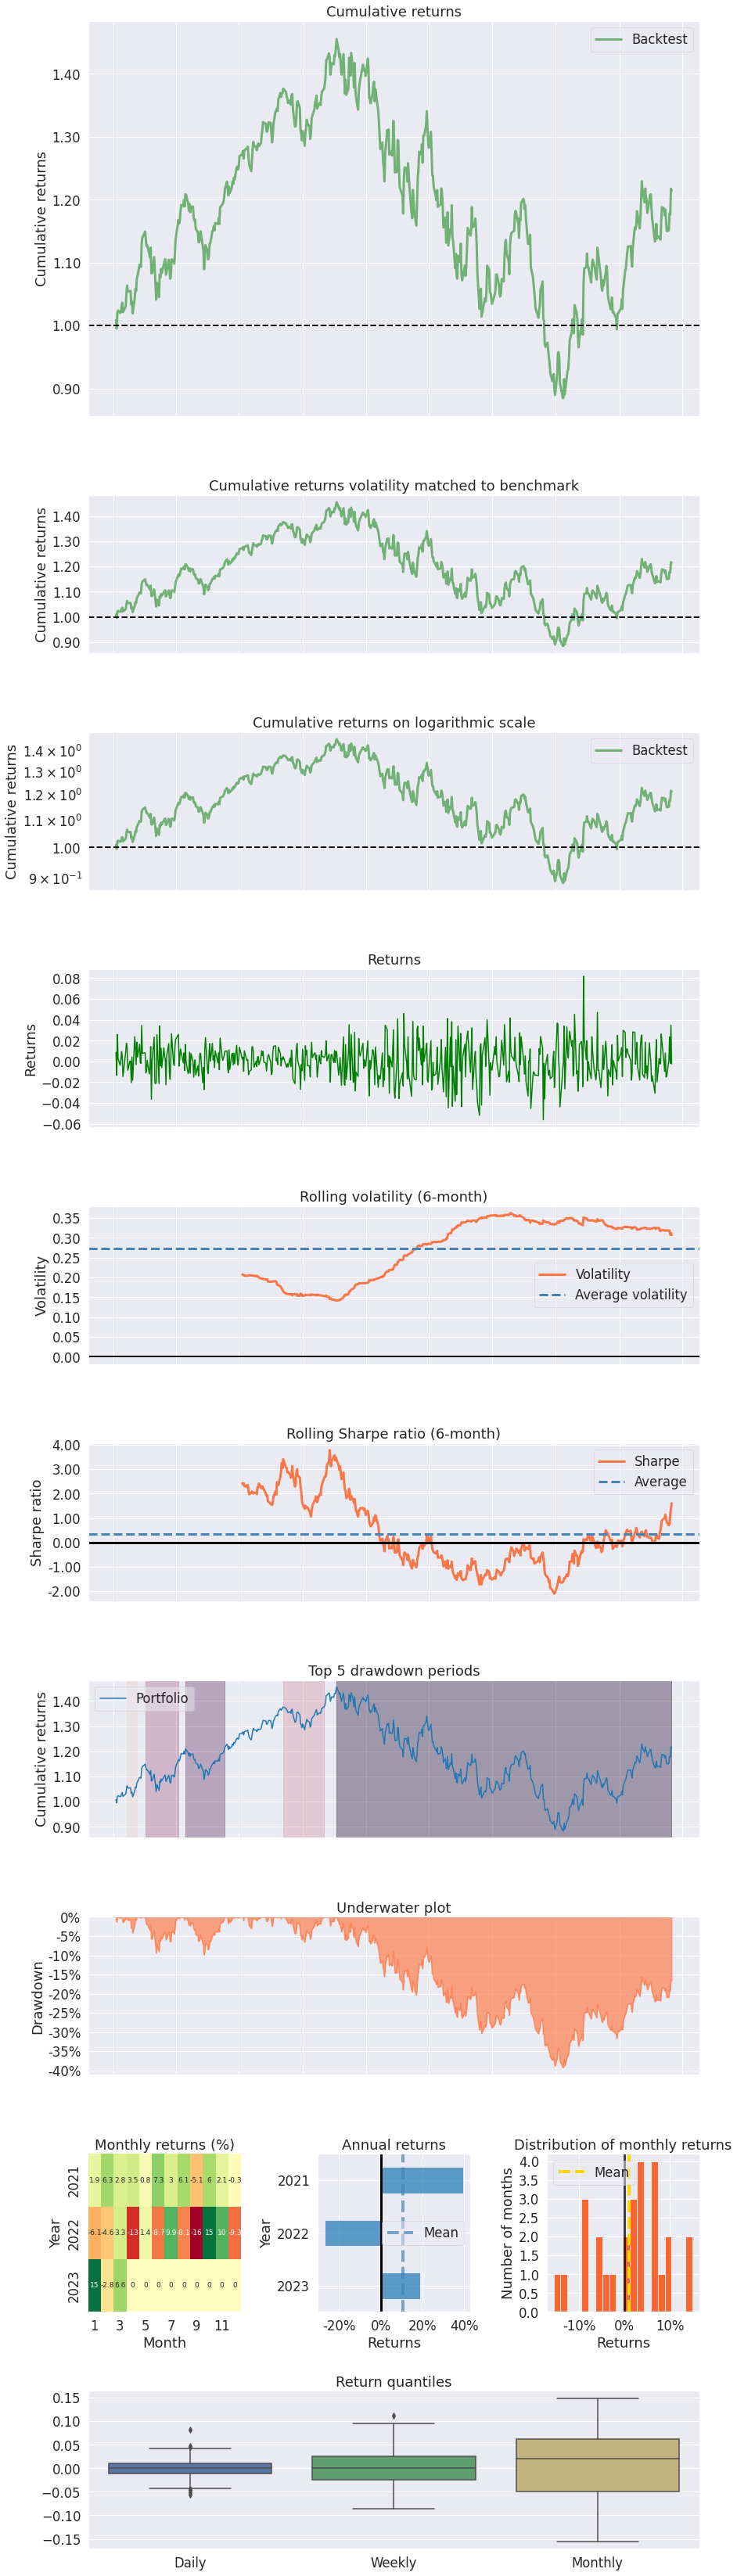

In [ ]:
#create the tearsheet
pf.create_returns_tear_sheet(returns_portfolio)

- Sharpe Ratio: 
  - excess returns over the risk-free rate per unit std.
  - the greater SR, the better portfolio's risk adjusted performance
- Max-drawdown(MDD):
  - largest peak to vally loss. The lower, the better, meaning down movements could not be volatile.
  - $MDD=\frac{Tough-Peak}{Peak}$
  - it measures the largest losses
- Calmar Ratio(Drawdown Ratio): 
  - average annual compounded rate of return divided by *Max-drawdown*
  - it measures the amount of risk required to obtain a return.
  - the higher, the better, meaning the return of investment was not at the risk of significant drawdowns.
  - Formula: $CR=\frac{R_p-R_f}{MDD}$
- Stability: the R-squared of a linear fit to the cumulative log returns.
- Omega Ratio: 
  - probability-weighted ratio of <u>gains over losses</u> for a *determined return target threshold*
  - $Ω=\frac{\sum{Winning}-Benchmarking}{\sum{Benchmarking}-Losing}$
    - Mathmatically: $Ω=\frac{\int_r^b(1-F(x))dx}{\int_a^rF(x)dx}$
      - $F$: cumulative distribution function of returns
      - $r$: minimum acceptable return defined by investor
  - the higher Omega ratio, the greater probability that a given return will achieved or exceeded
- Sortino Ratio:改良版的sharpe ratio
  - Formula: $SR=\frac{R_p-R_f}{\sigma_d}$
    - $\sigma_d$: standard deviation of the **downside**
      - it consider the `negative returns`, while sharpe ratio also consider the *positive upside volatility*
- Tail Ratio:
  - Definition: The ratio (absolute) between the 95th and 5th percentile of the daily returns.
- Underwater plot: focus on losses, plots all the drawdown periods and how long they lasted 


## Finding Efficient Frontier using Monte Carlo Simulations
- Efficient Frontier: **optimal portfolios** in risk-return combination.
  - 🌟Porfolios on the frontier:
    - gain the *highest expected return* for a given level of risk
    - have a *lowest level of risk* for a given level of expected returns
- All portfolios under efficient frontier curve are sub-optimal 

In [ ]:
n_portfolios=10**6 #set numbers of combinations for portfolios construction
time_horizon=252 #average numbers of trading day per year
risky_assets=['AAPL','TSLA','META','MSFT','GOOG']
risky_assets.sort() #to sort the stocks alphabetically
SD='2021-01-01'
ED='2021-12-31'
n_assets1=len(risky_assets)

In [ ]:
prices=yf.download(risky_assets, start=SD, end=ED,progress=False)

In [ ]:
#calculate the simple returns of individual stock, annual average return, and the annual covariance matrix
returns=prices['Adj Close'].pct_change().dropna()
avg_returns=returns.mean()*time_horizon
covariance_matrix = returns.cov()*time_horizon

In [ ]:
#simulate the random portfolio weights
np.random.seed(42) #set for reproduction
weights= np.random.random(size=(n_portfolios, n_assets1)) #the matrix size is (numbers of simulation paths * numbers of assets)
weights /= np.sum(weights, axis=1)[:, np.newaxis] #divide and assign, the sum of weights equal 1 in total

The formula to calculate portfolio standard deviation:
- $\sigma^2_p=W^T\sum W=\sum_i w_i^2\sigma_i^2+\sum_i \sum_{j≠i}w_iw_j\sigma_i\sigma_j\rho_{i,j}$
  - $W$: vector weight
  - $\sum$: historical covariance matrix
- Another way to get in coding: `np.diag(np.sqrt(np.dot(weights, np.dot(cov_mat, weights.T))))`


In [ ]:
#Calculate the portfolio metrics
#get porfolio return by weighted average method
Rp= np.dot(weights, avg_returns) 

#calculate portfolio volatility
portfolio_volatility= [] #create a empty list
for i in range(0, len(weights)):
    portfolio_volatility.append(np.sqrt(np.dot(weights[i].T, np.dot(covariance_matrix, weights[i])))) #std calculation use for loop
portfolio_volatility= np.array(portfolio_volatility) #convert into an array
Rf=0.0178
portfolio_sharpe_ratio = (Rp-Rf)/portfolio_volatility #calculate sharpe ratio of portfolio

In [ ]:
#save all of useful information into a dataframe
portfolio_results_df = pd.DataFrame({'returns': Rp,
                                     'volatility': portfolio_volatility,
                                     'sharpe_ratio': portfolio_sharpe_ratio})

In [ ]:
#create Efficient Frontier
n_points = 1000
portfolio_volatility_ef = []
indices_to_skip = []
#create the array for expected returns from sample with min and max portfolio returns
portfolio_results_ef = np.linspace(portfolio_results_df.returns.min(), portfolio_results_df.returns.max(), n_points)
#for calculation smoothing, we round them into 2 decimals
portfolio_results_ef = np.round(portfolio_results_ef, 2) 
Rp = np.round(Rp, 2)

#for each given expected return, we find the `minimum observable volatility`
for point_index in range(n_points):
    if portfolio_results_ef[point_index] not in Rp:
        indices_to_skip.append(point_index) #we skip out and drop these unmatched points
        continue
    matched_ind = np.where(Rp==portfolio_results_ef[point_index])
    portfolio_volatility_ef.append(np.min(portfolio_volatility[matched_ind]))
    Rp_ef = np.delete(portfolio_results_ef, indices_to_skip)

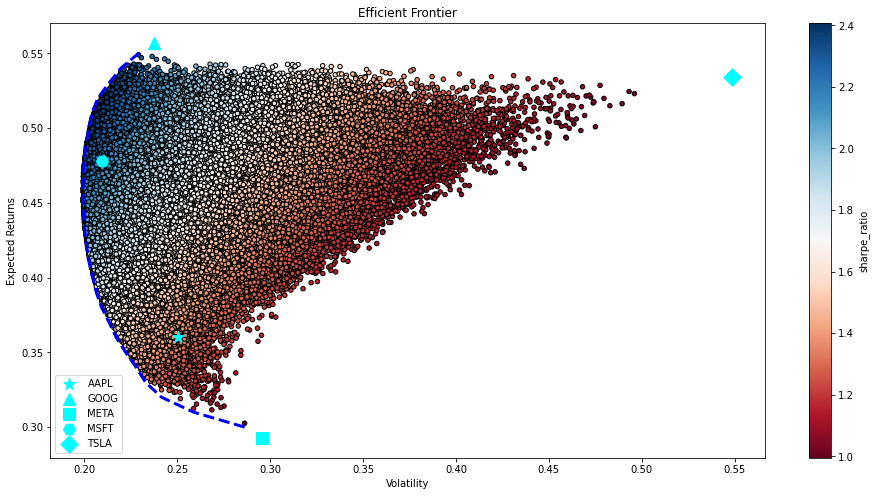

In [ ]:
#plot the Efficient Frontier
import matplotlib.pyplot as plt
MARKS = ['*', '^', 's', 'H','D']
#https://www.runoob.com/matplotlib/matplotlib-marker.html
fig, ax = plt.subplots(figsize=(16,8))
#plot the simulated results
portfolio_results_df.plot(kind='scatter', 
                          x='volatility', 
                          y='returns', 
                          c='sharpe_ratio', #color differetiated by sharpe ratio
                          cmap='RdBu', 
                          edgecolors='black', 
                          ax=ax)
ax.set(xlabel='Volatility', ylabel='Expected Returns', title='Efficient Frontier')
#plot the efficient frontier
ax.plot(portfolio_volatility_ef, portfolio_results_ef, 'b--',linewidth=3)
#plot the selected stocks position
for asset_index in range(n_assets1):
    ax.scatter(x=np.sqrt(covariance_matrix.iloc[asset_index, asset_index]), 
               y=avg_returns[asset_index], 
               marker=MARKS[asset_index], 
               s=150, 
               color='cyan',
               label=risky_assets[asset_index])
ax.legend()

- We can find the portfolios with **maximum Sharpe Ratio**, which called **Tangency Portfolio** or one with  **Minimum Volatility**.

In [ ]:
#find the portfolios indexes with Maximum Sharpe Ratio and Minimum Volatility
max_sharpe_index = np.argmax(portfolio_results_df.sharpe_ratio)
max_sharpe_portfolio = portfolio_results_df.loc[max_sharpe_index]

min_volatility_index = np.argmin(portfolio_results_df.volatility)
min_volatility_portfolio = portfolio_results_df.loc[min_volatility_index]

In [ ]:
#check the components of portfolios
print('---- Maximum Sharpe ratio portfolio ----')
print('Performance:')
for index, value in max_sharpe_portfolio.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)
print('\nWeights:')
for x, y in zip(risky_assets, weights[np.argmax(portfolio_results_df.sharpe_ratio)]):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

---- Maximum Sharpe ratio portfolio ----
Performance:
returns: 52.12% volatility: 20.91% sharpe_ratio: 240.77% 
Weights:
AAPL: 0.83% GOOG: 56.70% META: 0.55% MSFT: 41.39% TSLA: 0.53% 

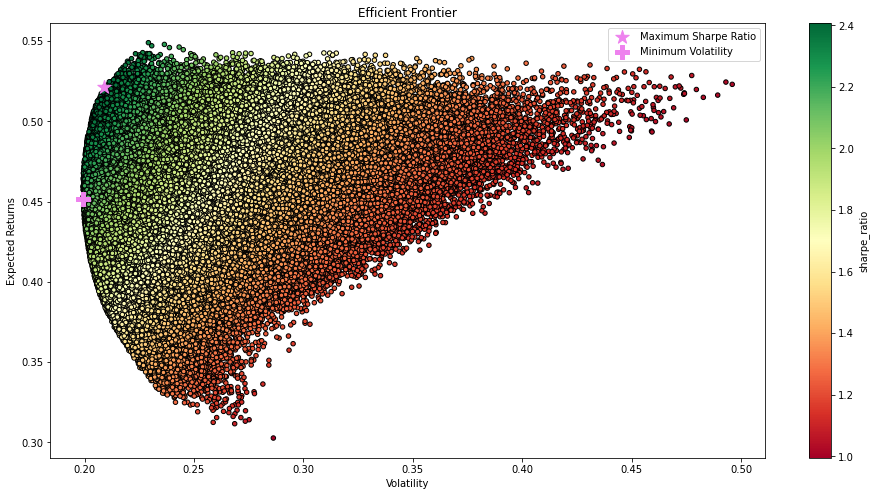

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
#plot the simulated results
portfolio_results_df.plot(kind='scatter', 
                          x='volatility', 
                          y='returns', 
                          c='sharpe_ratio',
                          cmap='RdYlGn', 
                          edgecolors='black', 
                          ax=ax)
#plot the portfolio with maximum sharpe ratio
ax.scatter(x=max_sharpe_portfolio.volatility, 
           y=max_sharpe_portfolio.returns, 
           c='violet', 
           marker='*', 
           s=200, 
           label='Maximum Sharpe Ratio')
#plot the portfolio with minimum volatility
ax.scatter(x=min_volatility_portfolio.volatility, 
           y=min_volatility_portfolio.returns, 
           c='violet', 
           marker='P', 
           s=200, 
           label='Minimum Volatility')
ax.set(xlabel='Volatility', 
       ylabel='Expected Returns', 
       title='Efficient Frontier')
ax.legend()

In [ ]:
print(min(portfolio_results_df['returns']), max(portfolio_results_df['returns']))

0.30265451948414607 0.5489992177904115


## Finding the Efficient Frontier using Optimization with `Scipy`
- Optimization idea: Find the optimal value of objective function by adjusting target variables with some constraints boundaries.
- In this case, out objective function: $f=min W^T\sum W$, with constrains:
  - $W>=0$
  - $W^t1=1$
  - $W^T \mu=\mu_p$
    - $\mu$: vector of returns
    - $\mu_p$: expected portfolio return
- coding model:

`
scipy.optimize.minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
`


In [ ]:
import scipy.optimize as sco
#https://docs.scipy.org/doc/scipy/reference/optimize.html
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize

In [ ]:
average_return=avg_returns

In [ ]:
#define the functions to calculate portfolio return and volatility
def port_return(w, average_return):
  return np.sum(average_return*w)
def port_volatility(w, average_return, covariance_matrix):
  return np.sqrt(np.dot(w.T,np.dot(covariance_matrix,w)))

In [ ]:
#define the functions to create efficient frontier
def EfficientFrontier(average_return, covariance_matrix, returns_range):
  efficient_portfolios=[] #create a empty list
  n_assets=len(average_return)
  args=(average_return, covariance_matrix)
  bounds=tuple((0,1) for asset in range(n_assets))
  initial_guess= n_assets * [1/n_assets, ] #initially, we naived guess it is a equal weighted portfolio for each asset.

  for returns in returns_range:
    constraints=({'type':'eq', #equality
                 'fun':lambda x: port_return(x,average_return)-returns}, #The function defining the constraint
                {'type':'eq',
                 'fun': lambda x: np.sum(x)-1})
    efficient_portfolio=sco.minimize( port_volatility, #the objective function
                                     initial_guess, #x0
                                     args=args,  #Extra arguments passed to the objective function and its derivatives
                                     method='SLSQP', #short for `Sequential Least-Squares Programming`
                                     constraints=constraints,
                                     bounds=bounds)
    efficient_portfolios.append(efficient_portfolio) 
  return efficient_portfolios

In [ ]:
#define the returns ranges
returns_range = np.linspace(0.30, 0.55, 200)

In [ ]:
#calculate the efficient frontier, apply the function we have defined
efficient_portfolios=EfficientFrontier(average_return, covariance_matrix, returns_range)

In [ ]:
#get the volatility ranges
volatilities_range = [x['fun'] for x in efficient_portfolios]

[Text(0.5, 0, 'Volatility'),
 Text(0, 0.5, 'Expected Returns'),
 Text(0.5, 1.0, 'Efficient Frontier')]

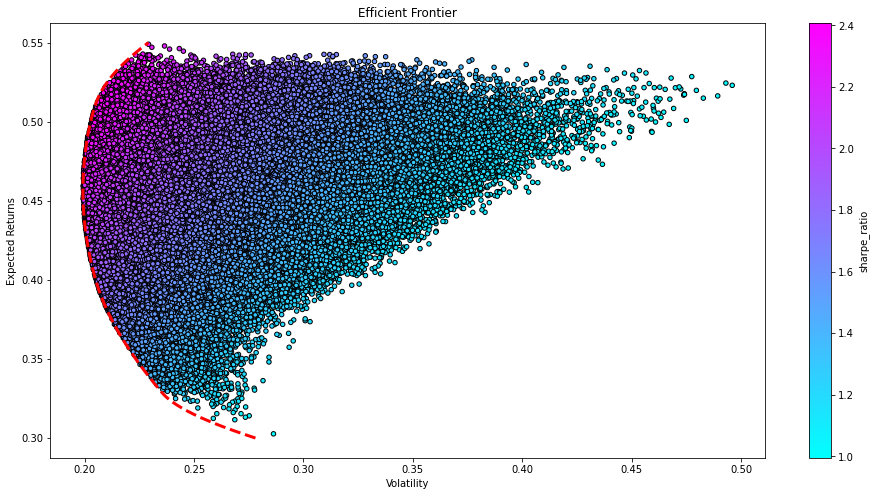

In [ ]:
#plot the Efficient Frontier
fig, ax = plt.subplots(figsize=(16,8))
portfolio_results_df.plot(kind='scatter', 
                          x='volatility',
                          y='returns', 
                          c='sharpe_ratio',
                          cmap='cool', 
                          edgecolors='black', 
                          ax=ax)
ax.plot(volatilities_range, returns_range, 'r--', linewidth=3)
ax.set(xlabel='Volatility', ylabel='Expected Returns', title='Efficient Frontier')

- This graph is similar to what we got with Monte Carlo Simulation, but with Scipy this efficient fronter is much smoother.

In [ ]:
#get the portfolio with minimum volatility
min_volatility_index = np.argmin(volatilities_range)
min_volatility_portfolio_return = returns_range[min_volatility_index]
min_volatility_portfolio_volatility = efficient_portfolios[min_volatility_index]['fun']

min_volatility_portfolio= {'Return': min_volatility_portfolio_return,
                           'Volatility': min_volatility_portfolio_volatility,
                           'Sharpe Ratio': ((min_volatility_portfolio_return-Rf) / min_volatility_portfolio_volatility)}

In [ ]:
#check the components and performance of this portfolio
print('---- Minimum volatility portfolio ----')
print('Performance:')
for index, value in min_volatility_portfolio.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)

print('\nWeights:')
for x, y in zip(risky_assets, efficient_portfolios[min_volatility_index]['x']):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

---- Minimum volatility portfolio ----
Performance:
Return: 45.70% Volatility: 19.92% Sharpe Ratio: 220.54% 
Weights:
AAPL: 16.50% GOOG: 20.62% META: 9.66% MSFT: 53.21% TSLA: 0.00% 

In [ ]:
#we try to draw the pie graph for visualize the relative proportion of componenet
!pip install riskfolio-lib
import riskfolio as rp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.0/220.0 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.0/908.0 KB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 KB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.3/222.3 KB 23.3 MB/s eta 0:00:00


/usr/local/lib/python3.9/dist-packages/riskfolio/src/PlotFunctions.py:635: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sizes2 = sizes2.append(item)


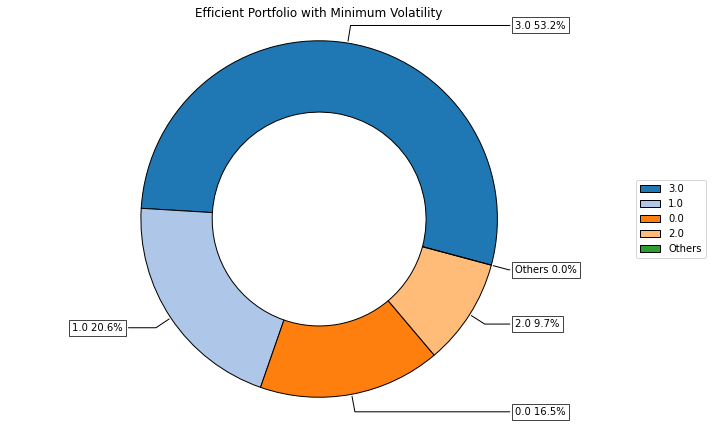

In [ ]:
ax = rp.plot_pie(w=pd.DataFrame(efficient_portfolios[min_volatility_index]['x']), 
                 title='Efficient Portfolio with Minimum Volatility', 
                 height=6, 
                 width=10,
                 cmap="tab20", 
                 ax=None)

In [ ]:
#find the portfolio with maximum sharpe ratio(tangency portfolio) 
#the objective function is negative sharpe ratio, to optimize with minimum problem
def neg_sharpe_ratio(w, average_return, covariance_matrix, Rf):
  portfolio_returns=np.sum(w*average_return)
  portfolio_volatility=np.sqrt(np.dot(w.T,np.dot(covariance_matrix, w)))
  portfolio_sharpe_ratio=(portfolio_returns-Rf)/portfolio_volatility
  return -portfolio_sharpe_ratio

In [ ]:
#find the optimized portfolio
n_assets=len(average_return)
args=(average_return, covariance_matrix, Rf)
constraints=({'type':'eq',
              'fun':lambda x:np.sum(x)-1}) #we only add the constraints that sum of all target variables=1
bounds=tuple((0,1) for asset in range(n_assets))
initial_guess=n_assets * [1. / n_assets]
max_sharpe_portfolio = sco.minimize(neg_sharpe_ratio, 
                                    x0=initial_guess, 
                                    args=args,
                                    method='SLSQP', 
                                    bounds=bounds, 
                                    constraints=constraints)

In [ ]:
#extract important information for this portfolio for later convenience
max_sharpe_portfolio_weight=max_sharpe_portfolio['x']
max_sharpe_portfolio= {'Return':port_return(max_sharpe_portfolio_weight, avg_returns),
                       'Volatility': port_volatility(max_sharpe_portfolio_weight, 
                                                     average_return,
                                                     covariance_matrix),
                       'Sharpe Ratio': -max_sharpe_portfolio['fun']}

In [ ]:
print('---- Maximum Sharpe Ratio portfolio ----')
print('Performance:')
for index, value in max_sharpe_portfolio.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)

print('\nWeights')
for x, y in zip(risky_assets, max_sharpe_portfolio_weight):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

---- Maximum Sharpe Ratio portfolio ----
Performance:
Return: 51.97% Volatility: 20.78% Sharpe Ratio: 241.57% 
Weights
AAPL: 0.00% GOOG: 52.20% META: 0.00% MSFT: 47.19% TSLA: 0.61% 

/usr/local/lib/python3.9/dist-packages/riskfolio/src/PlotFunctions.py:635: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sizes2 = sizes2.append(item)


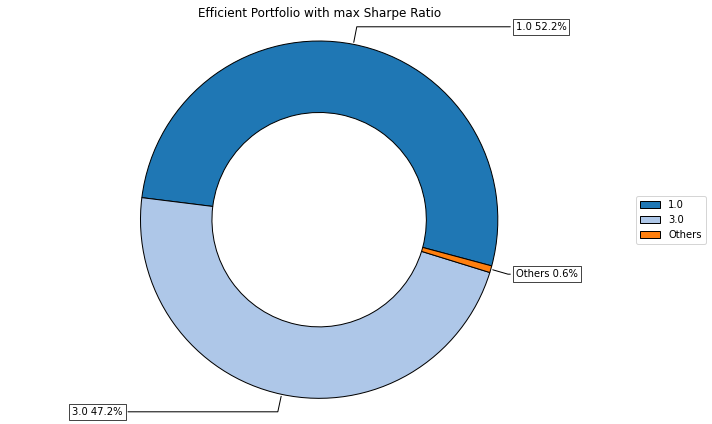

In [ ]:
ax = rp.plot_pie(w=pd.DataFrame(max_sharpe_portfolio_weight), 
                 title='Efficient Portfolio with max Sharpe Ratio', 
                 height=6, 
                 width=10,
                 cmap="tab20", 
                 ax=None)

## Finding the Efficient Frontier using Convex Optimization with `cvxpy`
- reframe the mean-variance optimization problem into risk-aversion framework, in this case, we want to **maximize the risk-adjust return**
- Objective Function: $max \space w^T\mu - 𝛾w^T\sum w$,   
  - with constrains:
    - $\sum_{i=1}^nw_i=1$
    - $w>=0$
    - $w^Tr>=target$
  - $𝛾$: 
    - range $[0,∞)$
    - risk-aversion parameter
    - the higher, the more risk-averse the investor is.

### Notes about Convex Optimization
- Convex set: contains line segment between any two points in the set
  - $x_1,x_2∊C$, $0≤θ≤1$, $\theta x_1+(1-\theta)x_2∊C$
  - $f(\theta x_1+(1-\theta)x_2)≤\theta f(x)+(1-\theta)f(y)$
    - convex function has *positive curvature*, to allow us to *get optimal points and minimize the function*
    - Conversion: $f \space concave↔︎-f \space convex$
- For convex problem: local minimum is global minimum.
- properties:
  1. a function $f$ is convex iff its epigraph is a convex set
  2. if $f$ is convex, its sublevel sets are convex.
  3. First-order characterization: if $f$ is differentiable, $f$ is convex iff $dom(f)$ is convex
    - $∇f(x)=0↔︎ x \space minimize \space f$
  4. Second-order characterization: if $f$ is twice differentiable, $f$ is convex iff $dom(f)$ is convex
    - $∇^2f(x)≽0↔︎ for \space x ∊dom(f)$
  5. Jensen's inequality: if $f$ is convex, $f(E(x))≤E[f(x)]$
  6. operations preserving convexity
    - nonnegative linear combination
    - pointwise maximization
    - Partial minimization
    - Affine composition: if $f$ is convex, $g(x)=f(Ax+b)$ is convex.
    - Vector compositon: $f(x)=h(g(x))=h(g_1(x),...,g_k(x))$, it depends on $h$ convex or concave, and decreasing or increasing

In [ ]:
!pip install cvxpy
import cvxpy as cp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#convert the annual average return and covariance matrix into array
average_return = average_return.values
covariance_matrix = covariance_matrix.values

In [ ]:
#set up the optimization problem🌟
#https://www.cvxpy.org/tutorial/intro/index.html#changing-the-problem
weights=cp.Variable(n_assets) #target variables
gamma=cp.Parameter(nonneg=True) #positive scalar parameter, risk-aversion parameter
port_return_convex=average_return*weights
port_volatility_convex=cp.quad_form(weights, covariance_matrix)  #cp.quad_form->x^T*yx
objective_function=cp.Maximize(port_return_convex - gamma*port_volatility_convex) #insert the objective function as the formula above, maximize the risk-adjusted return
problem=cp.Problem(objective_function, 
                   [cp.sum(weights) == 1, weights >= 0]) #add constraints

/usr/local/lib/python3.9/dist-packages/cvxpy/expressions/expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 2 times so far.

  warnings.warn(msg, UserWarning)


In [ ]:
#get the Efficient Frontier
n_points=30
#create the empty lists
port_return_convex_ef=np.zeros(n_points)
port_volatility_convex_ef=np.zeros(n_points)
weights_ef=[]
gamma_range = np.logspace(-3, 3, num=n_points) #use logspace to get 30 values of gamma using log scale

for i in range(n_points):
    gamma.value = gamma_range[i]
    problem.solve() #find the optimal solution
    #store the values into lists
    port_volatility_convex_ef[i] = cp.sqrt(port_volatility_convex).value
    port_return_convex_ef[i] = port_return_convex.value
    weights_ef.append(weights.value)

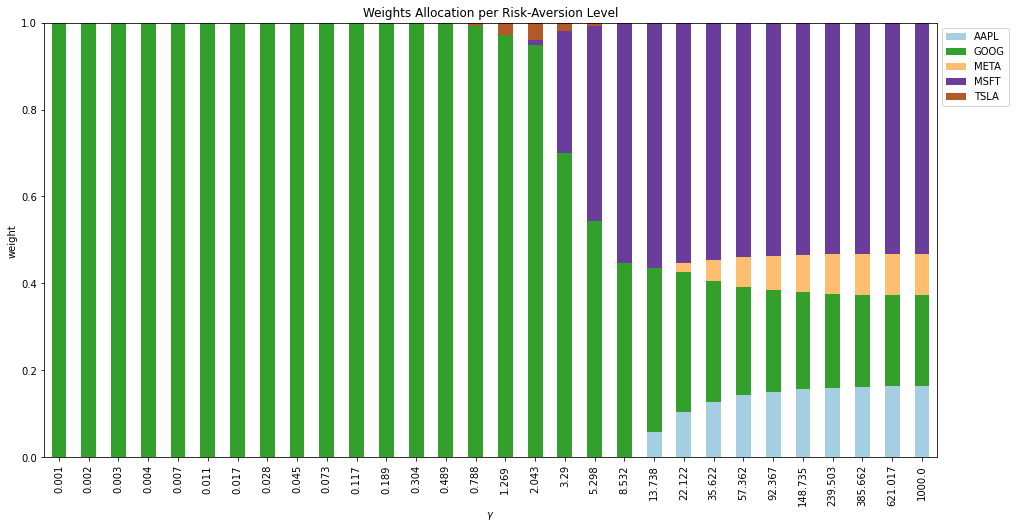

In [ ]:
#plot the different allocations varied with risk-aversion parameter
weights_df = pd.DataFrame(weights_ef, 
                          columns=risky_assets, 
                          index=np.round(gamma_range, 3))
ax = weights_df.plot(kind='bar', stacked=True, figsize=(16,8),cmap='Paired') 
ax.set(title='Weights Allocation per Risk-Aversion Level',xlabel=r'$\gamma$', ylabel='weight')
ax.legend(bbox_to_anchor=(1,1))

- For very small $γ$, investors should all in Google
- As $γ$ increasing, the allocation proportion of Google decreases, stock of Microsoft is allocated more.
- At the end of estimation, investors should invest 0 for Tesla stock.

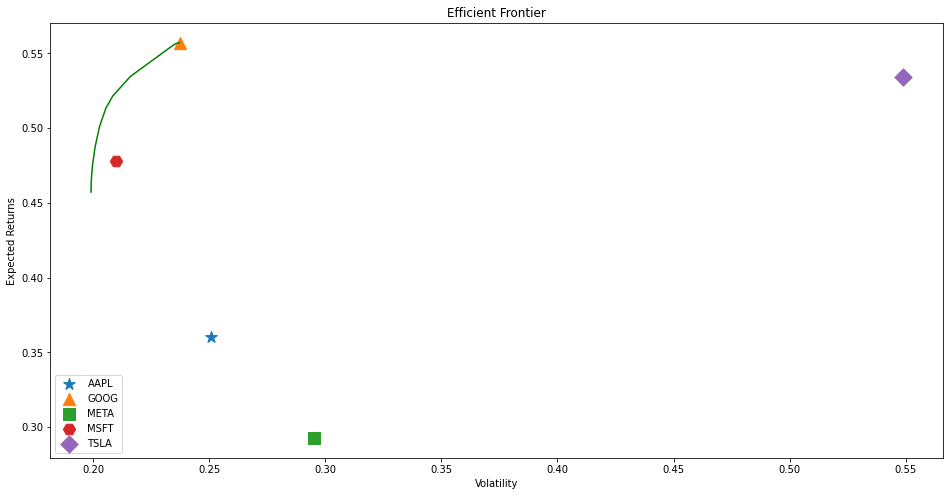

In [ ]:
#plot the Efficient Frontier with individual stock position
fig, ax = plt.subplots(figsize=(16,8))
#plot the efficient frontier curve
ax.plot(port_volatility_convex_ef,port_return_convex_ef, 'g-')
#plot the individual stock asset
for asset_index in range(n_assets):
     plt.scatter(x=np.sqrt(covariance_matrix[asset_index, asset_index]), 
                 y=average_return[asset_index], 
                 marker=MARKS[asset_index], 
                 label=risky_assets[asset_index],
                 s=150)
ax.set(title='Efficient Frontier',xlabel='Volatility', ylabel='Expected Returns', )
ax.legend()

- The Google stock lies very close to the Efficient Frontier

### Compare the Results with that of Scipy
- `minimize the volatility per expected level of return` VS `using the convex optimization and maximizing the risk-adjusted return`

[Text(0.5, 1.0, 'Efficient Frontier - Maximized Risk-Adjusted Return'),
 Text(0.5, 0, 'Volatility'),
 Text(0, 0.5, 'Expected Returns'),
 (0.15, 0.3),
 (0.25, 0.6)]

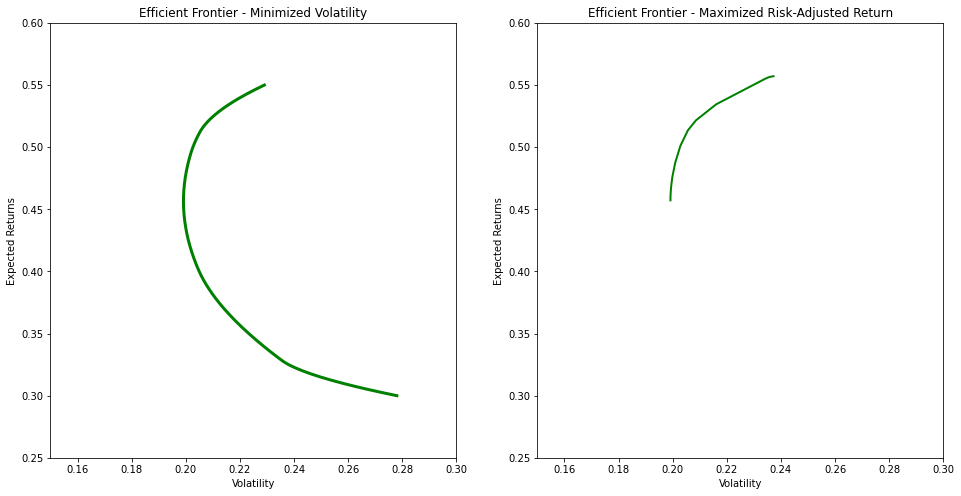

In [ ]:
x_lim = [0.15, 0.3]
y_lim = [0.25, 0.6]
fig, ax = plt.subplots(1, 2, figsize=(16,8))

ax[0].plot(volatilities_range, returns_range, 'g-', linewidth=3)
ax[0].set(title='Efficient Frontier - Minimized Volatility',
          xlabel='Volatility', 
          ylabel='Expected Returns',
          xlim=x_lim, 
          ylim=y_lim)

ax[1].plot(port_volatility_convex_ef,port_return_convex_ef, 'g-', linewidth=2)
ax[1].set(title='Efficient Frontier - Maximized Risk-Adjusted Return',
          xlabel='Volatility', 
          ylabel='Expected Returns',
          xlim=x_lim, 
          ylim=y_lim)

- The differences between these two lines:
  1. Owing to *using more points to generate*, the first EF is more **smoother** than second one.
  2. the values of second one become <u>larger</u> than the first one.

### Maximum Allowing Leverage
- the largest allowable size of a trading position permitted through a leveraged account.a
- leverage is a tool to manage risk and return, with various financial instruments or borrowed capital to increase potential return.
  - Upside: a leveraged stratagy requires low performance return of the portfolio to achieve high target level of performance.
  - downside: increase in exposure to downside risk.

In [ ]:
max_leverage=cp.Parameter() #if max_leverage=1, means no leverage, which is similar to previous optimization problem
problem_with_leverage=cp.Problem(objective_function, 
                                 [cp.sum(weights)==1,cp.norm(weights,1)<=max_leverage]) #add constraints

In [ ]:
leverage_range=[1,2,5]
len_leverage=len(leverage_range)
n_points=30
#create empty lists for setting objects placeholder
port_volatility_leveraged_ef = np.zeros((n_points, len_leverage))
port_return_leveraged_ef = np.zeros(( n_points, len_leverage))
weights_ef = np.zeros((len_leverage, n_points, n_assets))

for leverage_index, leverage in enumerate(leverage_range):
    for gamma_index in range(n_points):
        max_leverage.value = leverage
        gamma.value = gamma_range[gamma_index]
        problem_with_leverage.solve() #get the optimal value
        #store in the lists
        port_volatility_leveraged_ef[gamma_index, leverage_index] = cp.sqrt(port_volatility_convex).value
        port_return_leveraged_ef[gamma_index, leverage_index] = port_return_convex.value
        weights_ef[leverage_index, gamma_index, :] = weights.value 

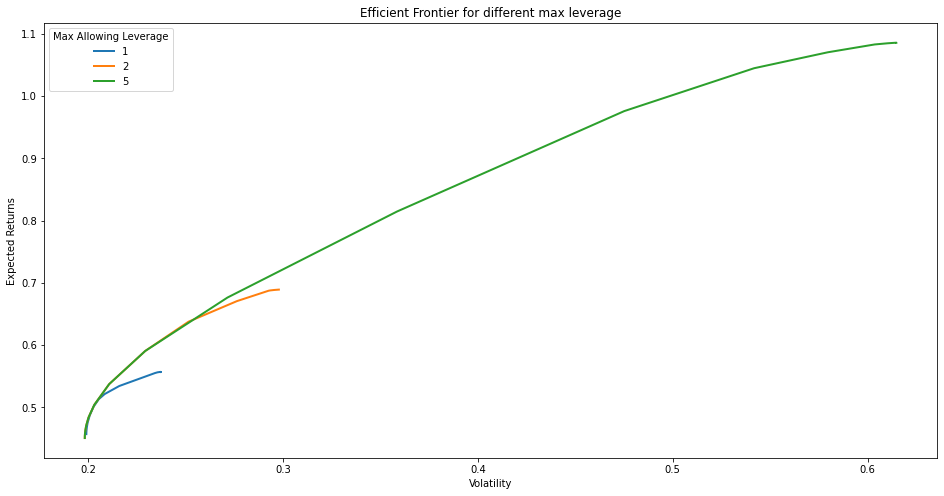

In [ ]:
#plot the efficient frontier with different maximum leverage
fig, ax = plt.subplots(figsize=(16,8))
for leverage_index, leverage in enumerate(leverage_range):
    plt.plot(port_volatility_leveraged_ef[:, leverage_index], 
             port_return_leveraged_ef[:, leverage_index], 
             label=f'{leverage}',
             linewidth=2,
             cmap='Paired')
ax.set(title='Efficient Frontier for different max leverage',xlabel='Volatility', ylabel='Expected Returns')
ax.legend(title='Max Allowing Leverage')

- The graph shows that higher leverage **increases returns** and allows for **greater volatility**.

Text(0.5, 1.0, 'Weights Allocation per Risk-Aversion Level')

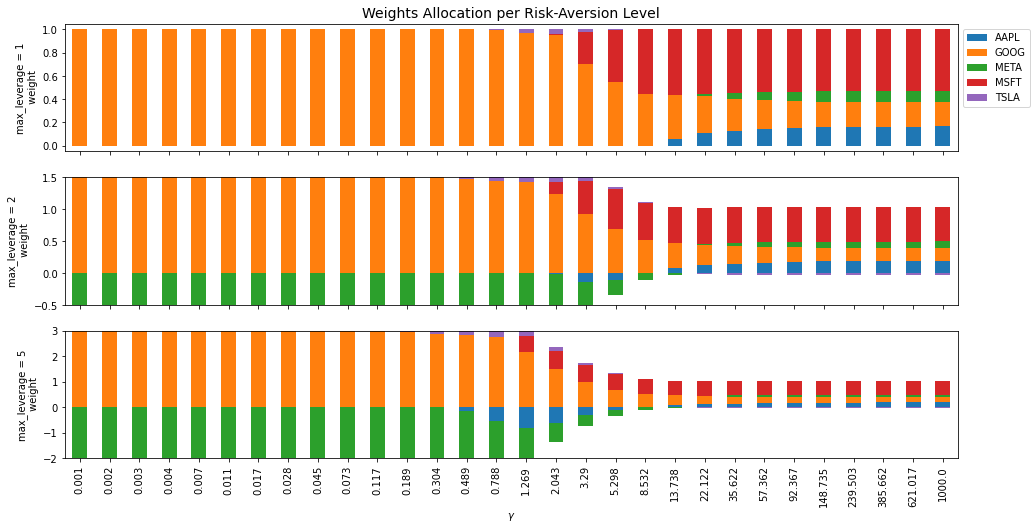

In [91]:
#create the stacked bar graph for checking the components weights allocation with different risk-aversion level
fig, ax = plt.subplots(len_leverage, 1, sharex=True, figsize=(16,8))
for ax_index in range(len_leverage):
    weights_df = pd.DataFrame(weights_ef[ax_index], 
                              columns=risky_assets, 
                              index=np.round(gamma_range, 3))
    weights_df.plot(kind="bar", stacked=True, ax=ax[ax_index], legend=None) 
    ax[ax_index].set(ylabel=(f"max_leverage = {leverage_range[ax_index]}""\n weight"))
ax[len_leverage - 1].set(xlabel=r"$\gamma$")
ax[0].legend(bbox_to_anchor=(1,1))
ax[0].set_title("Weights Allocation per Risk-Aversion Level",fontsize=14)

- From the bar graph, with an increase in risk aversion, investors stop using leverage altogether.

## Finding the Optimal Portfolio with Hierarchical Risk Parity(HRP)

## Black-Litterman in Portfolio Optimization

## Kelly Criterion on Portfolio Optimization